# TP 3: Análisis Descriptivo y Predicción de Desocupación
##### Fecha de entrega: 15 de noviembre de 2024
##### Profesor: Walter Sosa Escudero, Tomás Pachecon

La Encuesta Permanente de Hogares (EPH) es un programa nacional de producción sistemática y permanente de indicadores sociales que lleva a cabo el Instituto Nacional de 
Estadística y Censos (INDEC), que permite conocer las características sociodemográfica 
y socioeconómicas de la población. Uno de los indicadores mas valiosos sobre el merca o
 laboral que pueden obtenerse con los datos de esta encuesta es la tasa de desocupacióndas.

## Parte I: Analizando la base

### Ejercicio 1
Utilizando información disponible en la pagina del INDEC, expliquen brevemente como se identifica a las personas desocupadas.

### Ejercicio 2
Entren a la pagina y vayan a la sección Servicios y 
Herramientas ->Bases de datos. Descarguen la base de microdatos de la Encuest 
Permanente de Hogares (EPH) correspondiente al primer trimestre de 2004 y 20 4
en formato .dta y .xls, respectivamente (una vez descargadas, las bases a usar deberán llamarse individual_T104.dta y usu_individual_T124.xls). En la pag na
web, también encontrará un diccionario de variables con el nombre de “Diseñ  de
registro y estructura para las bases preliminares (hogares y personas)”. Desca guen
el diccionario de cada año. En estos archivos se les indica qué significa cada va iable
que aparece en la base de datos, en particular, en la sección de Diseño de re istros
de la base Personas.

#### Parte A
Cada grupo va a trabajar con un aglomerado distinto (nosotros somos grupo 8 - Tucumán). Quédense con las observaciones correspondientes a su aglomerado y unan ambos trimestres en una sola base.

In [763]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

#Parte A

# Para comenzar, definimos la carpeta
carpeta = "/Users/gasparhayduk/Desktop/BigData/TPs/TP3"


# Definimos los nombres de los archivos
archivo_dta = "individual_T104.dta"
archivo_xls = "usu_individual_T124.xlsx"

# Cargamos el archivo .dta, que es la base del 2004
datos_dta = pd.read_stata(os.path.join(carpeta, archivo_dta))

# Cargamos el archivo .xls, que es la base del 2024
datos_xls = pd.read_excel(os.path.join(carpeta, archivo_xls))

# En primer lugar, vamos a solucionar un problema de codificación de los datos, lo cual nos facilitará la realización de todos los ejercicios en el futuro. 
# Establecemos el diccionario de mapeos para cada columna (ajustado según los valores exactos), según como aparecen en la base del 2004
mapeos = {
    'ch03': {'Jefe': 1, 'Cónyuge/Pareja': 2, 'Hijo/Hijastro': 3, 'Yerno/Nuera': 4, 'Nieto': 5, 'Madre/Padre': 6, 'Suegro': 7, 'Hermano': 8, 'Otros familiares': 9, 'No familiares': 10},
    'ch04': {'Varón': 1, 'Mujer': 2},
    'ch06': {'Menos de 1 año': 0, '98 y más años': 99},
    'ch07': {'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5, 'Ns./Nr.': 9},
    'ch08': {'Obra social (incluye PAMI)': 1, 'Mutual/Prepaga/Servicio de emergencia': 2, 'Planes y seguros públicos': 3, 'No paga ni le descuentan': 4, 'Ns./Nr.': 9, 'Obra social y mutual/prepaga/servicio de emergencia': 1, 'Obra social y planes y seguros públicos': 1, 'Obra social, mutual/prepaga/servicio de emergencia y planes': 1, 'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 2},
    'ch09': {'Sí': 1, 'No': 2, 'Menor de 2 años': 3, 'Ns./Nr.': 9 },
    'ch10': {'Sí, asiste': 1, 'No asiste, pero asistió': 2, 'Nunca asistió': 3, 'Ns./Nr.': 9},
    'ch11': {'Público': 1, 'Privado': 2, 'Ns./Nr.': 9},
    'ch12': {'Jardín/Preescolar': 1, 'Primario': 2, 'EGB': 3, 'Secundario': 4, 'Polimodal': 5, 'Terciario': 6, 'Universitario': 7, 'Posgrado Universitario': 8, 'Ns./Nr.': 0, 'Educación especial (discapacitado)': 9},
    'ch13': {'Sí': 1, 'No': 2, 'Ns./Nr.': 9},
    'ch14': {'Ninguno': 0, 'Primero': 1, 'Segundo': 2, 'Tercero': 3, 'Cuarto': 4, 'Quinto': 5, 'Sexto': 6, 'Séptimo': 7, 'Octavo': 8, 'Noveno': 9},
    'nivel_ed': {'Primaria Incompleta (incluye educación especial)': 1, 'Primaria Completa': 2, 'Secundaria Incompleta': 3, 'Secundaria Completa': 4, 'Superior Universitaria Incompleta': 5, 'Superior Universitaria Completa': 6, 'Sin instrucción': 7, 'Ns./Nr.': 9},
    'estado': {'Entrevista individual no realizada (no respuesta al cuestion': 0, 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años': 4},
    'cat_ocup': {'Patrón': 1, 'Cuenta propia': 2, 'Obrero o empleado': 3, 'Trabajador familiar sin remuneración': 4, 'Ns./Nr.': 9},
    'cat_inac': {'Jubilado/pensionado':1 ,'Rentista':2, 'Estudiante':3,'Ama de casa':4,  'Menor de 6 años':5, 'Discapacitado':6, 'Otros':7},

}
# Aplicar mapeos condicionalmente con .apply
for col, mapeo in mapeos.items():
    datos_dta[col] = datos_dta[col].apply(lambda x: mapeo.get(x, x))  # Si no encuentra el valor, deja el original

# Verificamos de los cambios queden realizados en la base de datos completa. 
for col in mapeos.keys():
    print(datos_dta[col].unique())
    print()

# Filtramos el DataFrame para quedarse solo con el aglomerado "Gran Tucumán - Tafí Viejo"
datos_tucuman04 = datos_dta[datos_dta['aglomerado'] == "Gran Tucumán - Tafí Viejo"]
datos_tucuman24 = datos_xls[datos_xls["AGLOMERADO"]== 29 ]

#Ahora, para unificar las bases de datos, vemos cuales son las columnas que tenemos en cada base, para que coincidan, haremos que se modifiquen y queden todas en mayúscula. 
datos_tucuman04.columns = datos_tucuman04.columns.str.upper()
datos_tucuman24.columns = datos_tucuman24.columns.str.upper()

# Creamos un nuevo objeto, en donde buscamos cuales son las columnas comunes en ambas bases, haciendo la unión.
columnas_comunes = set(datos_tucuman04.columns).union(set(datos_tucuman24.columns))

# Reindexar ambos DataFrames para tener las mismas columnas (y en el mismo orden)
datos_tucuman04 = datos_tucuman04.reindex(columns=columnas_comunes)
datos_tucuman24 = datos_tucuman24.reindex(columns=columnas_comunes)

# Concatenamos los DataFrames apilando uno debajo del otro
datos_panel = pd.concat([datos_tucuman04, datos_tucuman24], axis=0)

#Las volvemos a poner en el orden original para que sea mas sencilla su lectura
orden_columnas = datos_xls.columns
datos_panel = datos_panel[orden_columnas]

[1, 2, 3, 6, 9, 8, 7, 5, 10, 4]
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

[1, 2]
Categories (2, int64): [1 < 2]

[79.0, 67.0, 74.0, 54.0, 51.0, ..., 88.0, 99.0, 91.0, 97.0, 95.0]
Length: 99
Categories (99, float64): [0.0 < 1.0 < 2.0 < 3.0 ... 95.0 < 96.0 < 97.0 < 99.0]

[4, 3, 2, 5, 1, 9]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 9]

[1 4 2 3 9]

[1, 2, 3, 9]
Categories (4, int64): [1 < 2 < 3 < 9]

[2.0, 1.0, 3.0, 0.0, 9.0]
Categories (5, float64): [0.0 < 1.0 < 2.0 < 3.0 < 9.0]

[0.0, 1.0, 2.0, 9.0]
Categories (4, float64): [0.0 < 1.0 < 2.0 < 9.0]

[4. 2. 7. 6. 0. 1. 5. 3. 9. 8.]

[2.0, 1.0, 0.0, 9.0]
Categories (4, float64): [0.0 < 1.0 < 2.0 < 9.0]

['03' '  ' '04' '02' '01' '06' '00' '05' '07' '09' '99' '08' '98']

[3, 2, 6, 5, 4, 1, 7]
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7]

[3, 1, 2, 4, 0]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

[0.0, 2.0, 4.0, 3.0, 1.0]
Categories (5, float64): [0.0 < 1.0 < 2.0 < 3.0 < 4.0]

[1.0, 0.0, 4.0, 3.0, 5.0, 2.0, 7.0, 6

/var/folders/74/w7sgy8hs6c50_02v8h79362m0000gn/T/ipykernel_17377/2049152113.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  datos_panel = pd.concat([datos_tucuman04, datos_tucuman24], axis=0)
/var/folders/74/w7sgy8hs6c50_02v8h79362m0000gn/T/ipykernel_17377/2049152113.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  datos_panel = pd.concat([datos_tucuman04, datos_tucuman24], axis=0)
/var/folders/74/w7sgy8hs6c50_02v8h79362m0000gn/T/ipykernel_17377/2049152113.py:67: FutureWarning: The beha

#### Parte B 
Si hay observaciones con valores que no tienen sentido, descártenlas (por ejemplo, ingresos y edades negativos). Expliquen las decisiones tomadas.

In [765]:
# Parte B
# Primero lo que queremos observar, es un resumen de todos los resultados, para evaluar si existen datos que no tienen sentido, y por tanto se deben descartar. 
# Creamos una lista para almacenar los resultados
resultados = []

# Iterar por cada columna y obtener los valores únicos y su frecuencia
for columna in datos_panel.columns:
    conteo = datos_panel[columna].value_counts(dropna=False)  # Incluye NaN si hay
    for valor, frecuencia in conteo.items():
        resultados.append({
            'Variable': columna,
            'Valor': valor,
            'Frecuencia': frecuencia
        })

# Convertir la lista de resultados en un DataFrame
resumen_df = pd.DataFrame(resultados)

#De este resumen aprendimos todos los valores dados en cada variable, y los comparamos con los valores esperados en el resumen otorgado por el indec. 
#Cabe destacar, que aunque no se detalla en dicho resumen, encontramos varios "0" en variables como H15, CH10, y CH11, entre otros, cuando no es una variable identificada. Asumimos que es una ausencia de la observación. 

# Ahora, eliminaremos los valores que no tienen sentido en los ingresos y los salarios. En estos dos casos, eliminaremos cualquier valor que sea negativo, conservando las ausencias de observaciones. 
# Definimos las columnas de ingreso y la columna de edad
columnas_ingreso = ['PP08D1', 'IPCF', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3']

# Convertimos columnas de ingreso y edad a formato numérico, forzando errores a NaN
datos_panel['CH06'] = pd.to_numeric(datos_panel['CH06'], errors='coerce')
for columna in columnas_ingreso:
    datos_panel[columna] = pd.to_numeric(datos_panel[columna], errors='coerce')

# Creamos un filtro para asegurar que todos los montos de ingreso y edad sean no negativos o NaN
filtro = (datos_panel['CH06'] >= 0) | (datos_panel['CH06'].isna())
for columna in columnas_ingreso:
    filtro &= (datos_panel[columna] >= 0) | (datos_panel[columna].isna())

# Aplicamos el filtro al DataFrame completo
datos_panel_limpio = datos_panel[filtro] 

/var/folders/74/w7sgy8hs6c50_02v8h79362m0000gn/T/ipykernel_17377/4263135169.py:8: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  conteo = datos_panel[columna].value_counts(dropna=False)  # Incluye NaN si hay


#### Parte C
Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la composición por sexo para 2004 y 2024. Comenten los resultados

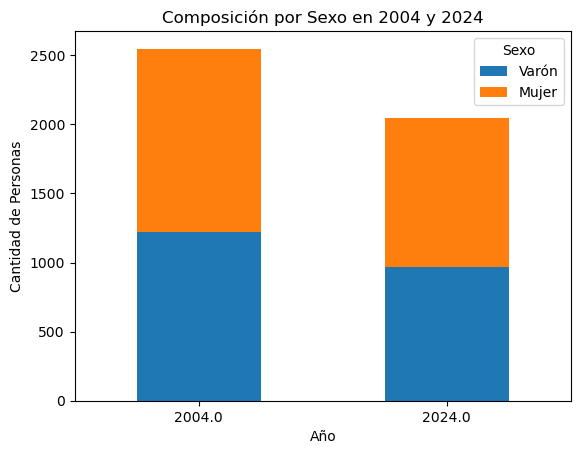

In [767]:
#Parte C

# Contar la cantidad de personas por año y sexo
conteo_sexo = datos_panel_limpio.groupby(['ANO4', 'CH04']).size().unstack()

# Crear el gráfico de barras
conteo_sexo.plot(kind='bar', stacked=True)
plt.title("Composición por Sexo en 2004 y 2024")
plt.xlabel("Año")
plt.ylabel("Cantidad de Personas")
plt.legend(["Varón", "Mujer"], title="Sexo")
plt.xticks(rotation=0)
# plt.savefig("Grafico_sexo.png", format="png", dpi=300)
plt.show()

#Lo que podemos observar de este gráfico, es que si bien la proporción de sexos se mantuvo medianamente constante en el tiempo, disminuyeron la cantidad de personas encuestadas para esta región entre el 2004 y el 2024.


#### Parte D
Realicen una matriz de correlación para 2004 y 2024 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF. Utilicen alguno de los comandos disponibles en este link o este link para graficar la matriz de correlación. Comenten los resultados.

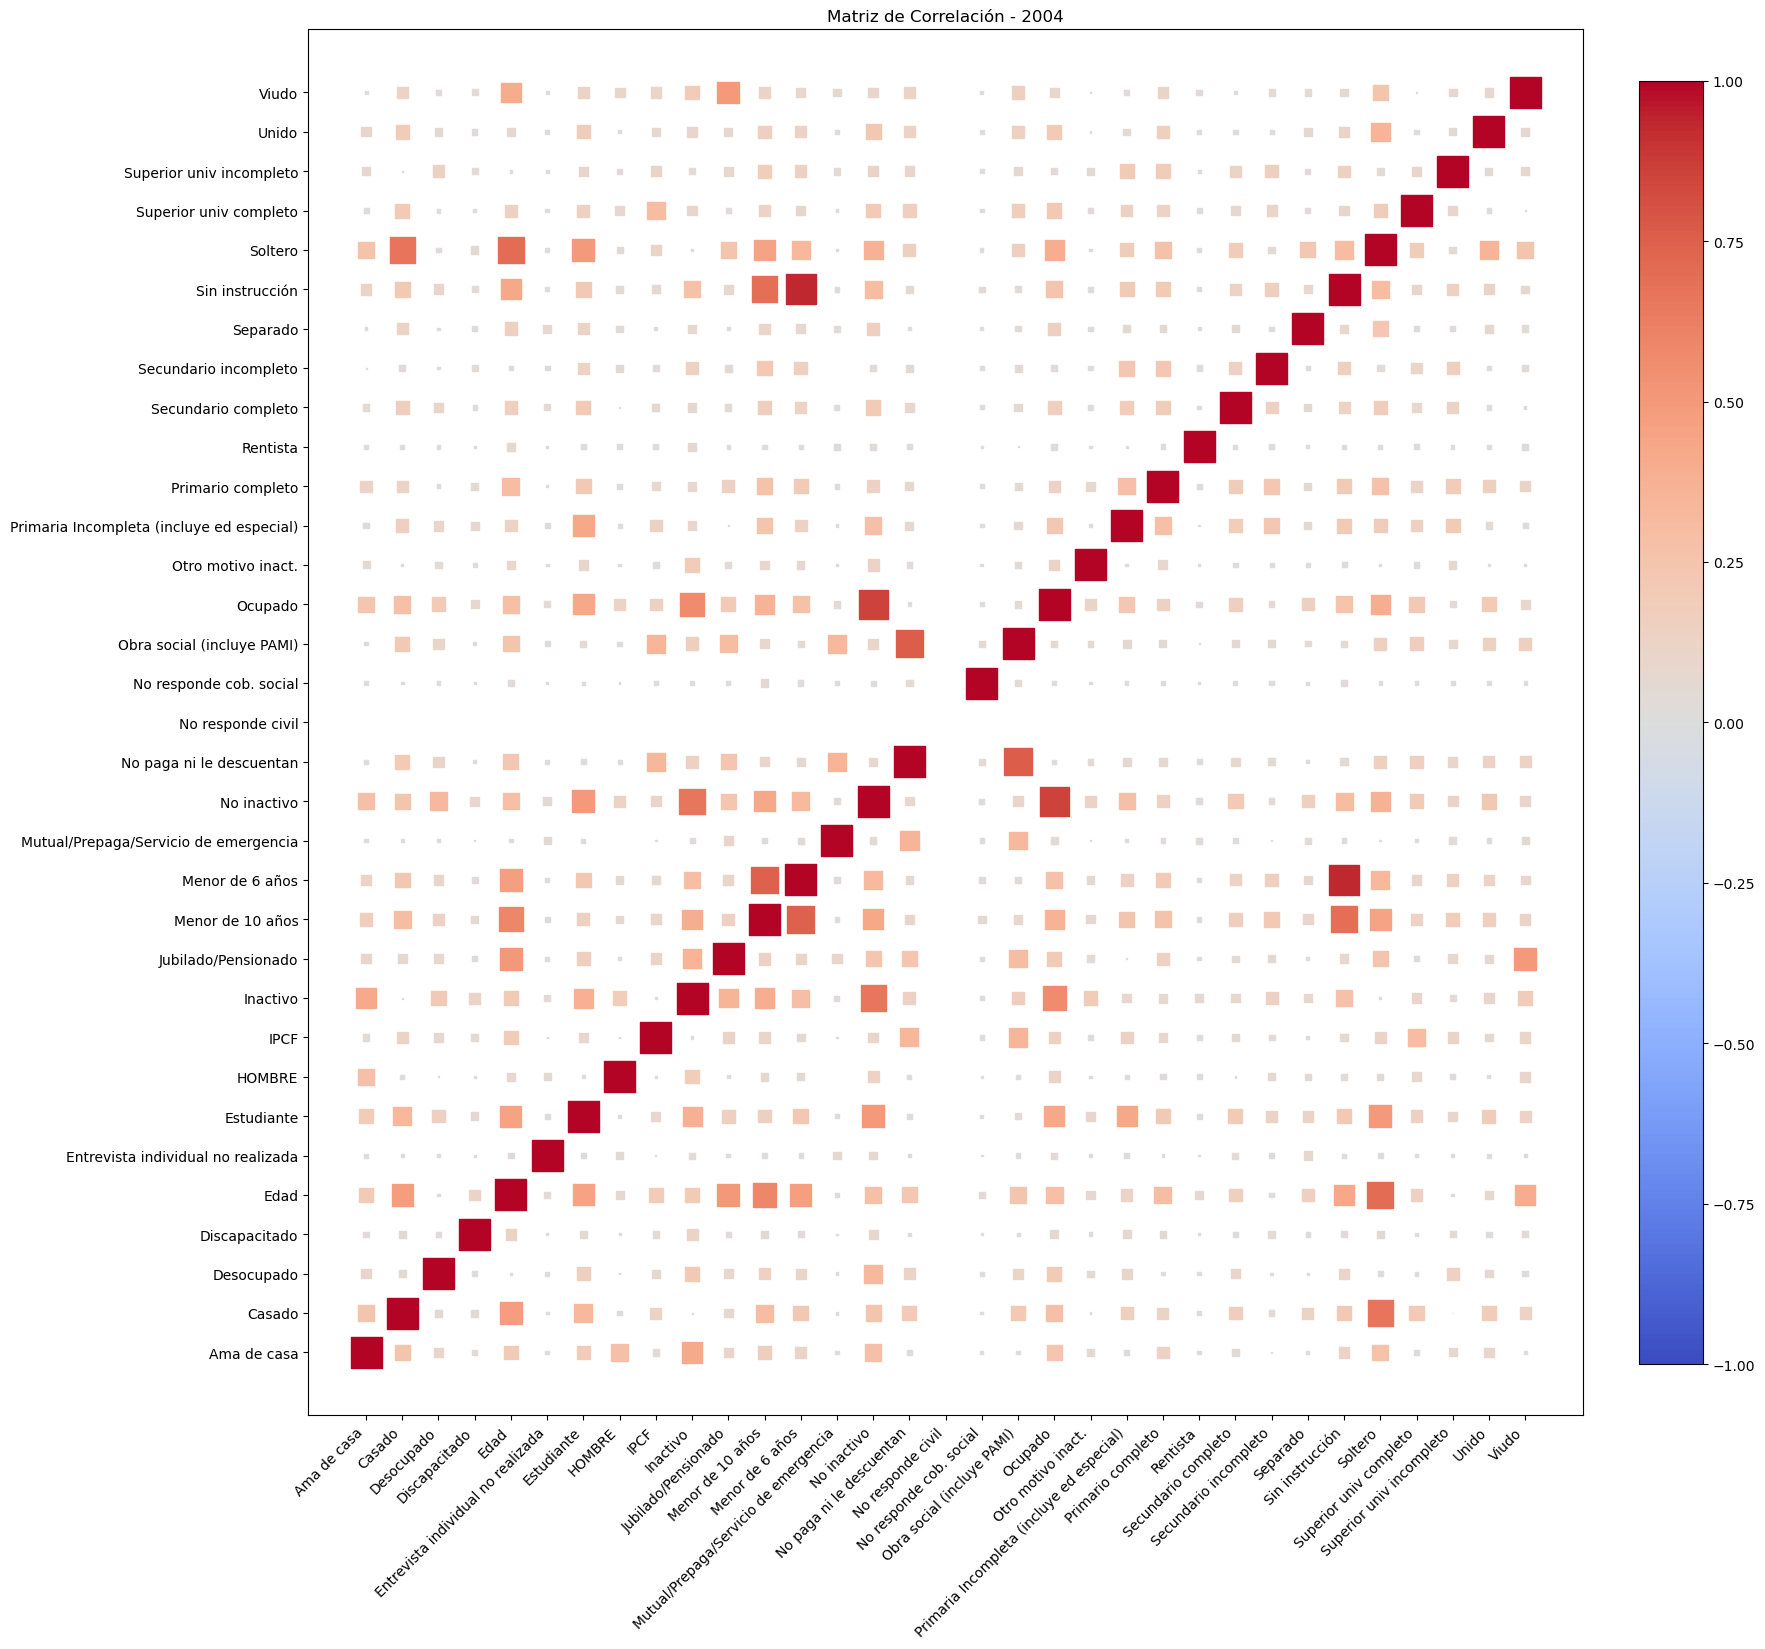

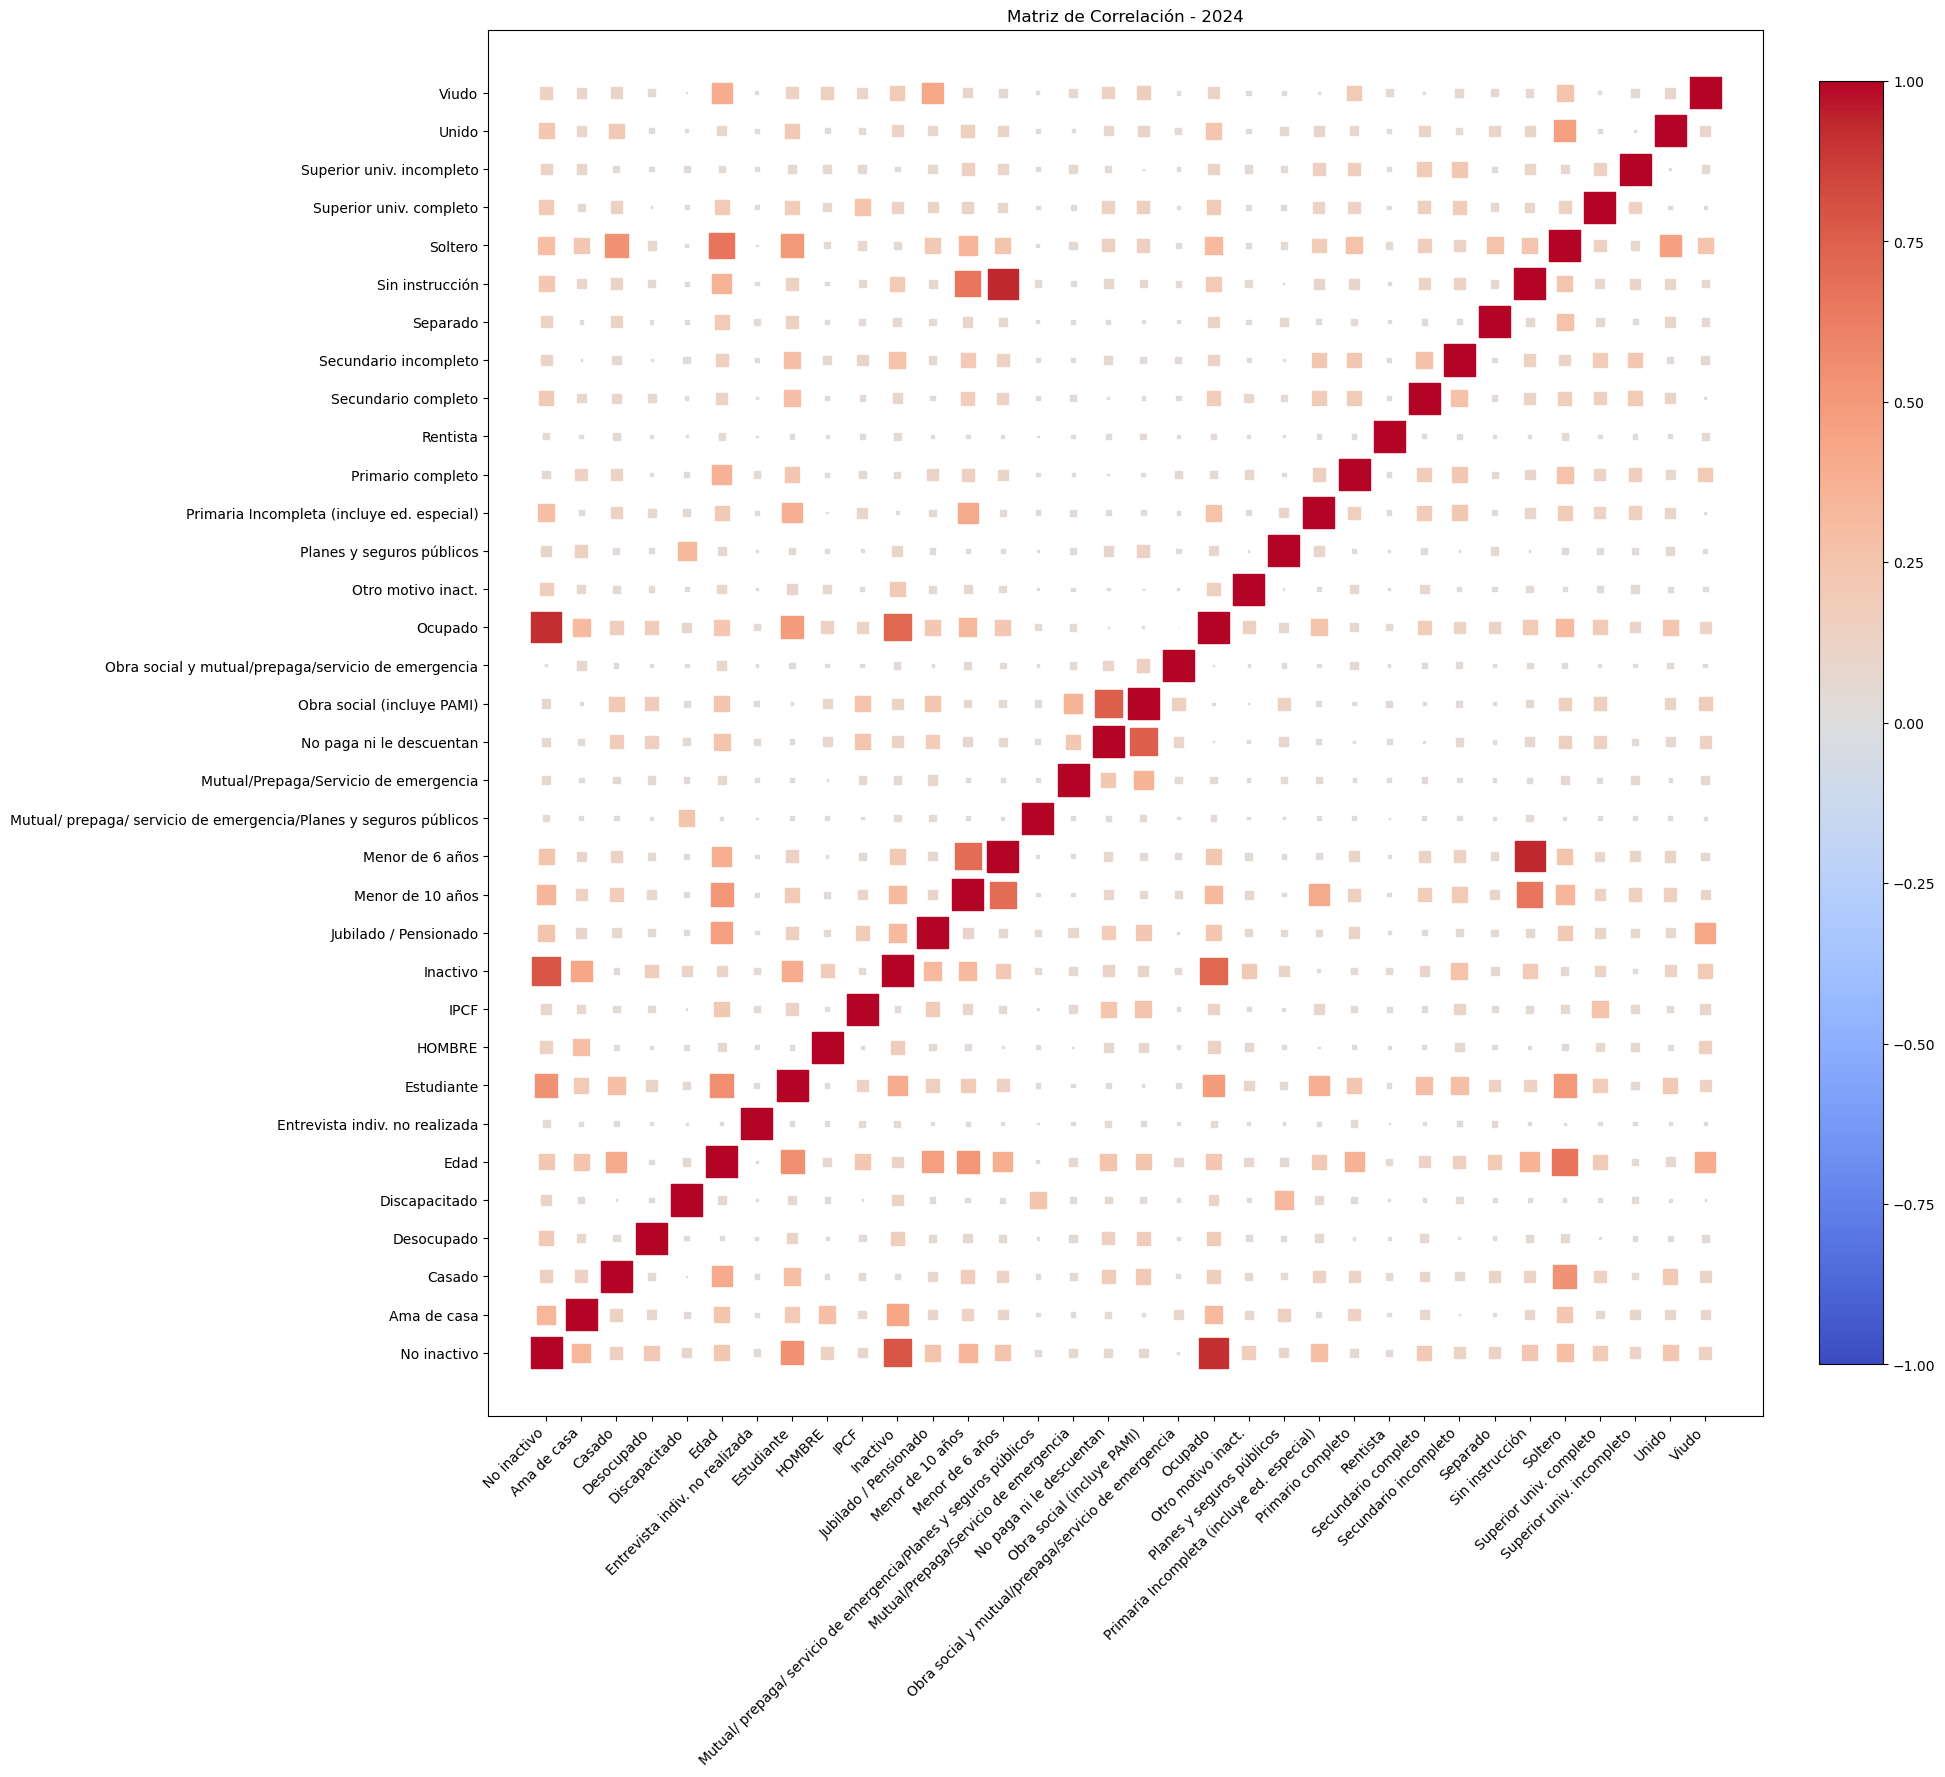

In [791]:
#Parte D 
variables_interes = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']


# Filtrar los datos de 2004 y 2024
datos_2004 = datos_tucuman04[variables_interes]
datos_2024 = datos_tucuman24[variables_interes] 

#------------------Hacemos One Hot Encoding para CH07, CH08, NIVEL_ED, CAT_INAC, ESTADO y CH04:
# Estas son variables donde cada valor representa una categoria. Hay que usar una dummy por categoria. 

#----- 2004
# CH07: Estado Civil
datos_2004 = pd.get_dummies(datos_2004, columns=['CH07'], prefix='civ') 

# CH08: Cobertura Social
datos_2004 = pd.get_dummies(datos_2004, columns=['CH08'], prefix='cob') 


# NIVEL_ED:
datos_2004 = pd.get_dummies(datos_2004, columns=['NIVEL_ED'], prefix='ED')

# CH04: Sexo:
datos_2004['HOMBRE'] = datos_2004['CH04'].apply(lambda x: 1 if x==1 else 0)

# Dropeo CH04:
datos_2004.drop(['CH04'], axis=1, inplace=True) 

# CAT_INAC: Categoría de inactividad
datos_2004 = pd.get_dummies(datos_2004,columns=['CAT_INAC'], prefix='incap')

# ESTADO:
datos_2004 = pd.get_dummies(datos_2004, columns=['ESTADO'], prefix='ES')


# Paso los true y false a 1s y 0s: 
datos_2004 = datos_2004.astype(int) 

#----- 2024
# CH07: Estado Civil
datos_2024 = pd.get_dummies(datos_2024, columns=['CH07'], prefix='civ') 

# CH08: Cobertura Social
datos_2024 = pd.get_dummies(datos_2024, columns=['CH08'], prefix='cob') 


# NIVEL_ED:
datos_2024 = pd.get_dummies(datos_2024, columns=['NIVEL_ED'], prefix='ED')

# CH04: Sexo:
datos_2024['HOMBRE'] = datos_2024['CH04'].apply(lambda x: 1 if x==1 else 0)

# Dropeo CH04:
datos_2024.drop(['CH04'], axis=1, inplace=True) 

# CAT_INAC: Categoría de inactividad
datos_2024 = pd.get_dummies(datos_2024,columns=['CAT_INAC'], prefix='incap')
# ESTADO:
datos_2024 = pd.get_dummies(datos_2024, columns=['ESTADO'], prefix='ES')


# Paso los true y false a 1s y 0s: 
datos_2024 = datos_2024.astype(int) 



#Deberiamos renombrar variables para que salgan bien en la matriz de correlaciones: 
datos_2004.rename(columns={'CH06': 'Edad', 
                           'civ_1': 'Unido',
                          'civ_2': 'Casado',
                          'civ_3': 'Separado',
                          'civ_4': 'Viudo',
                          'civ_9': 'No responde civil',
                          'civ_5': 'Soltero' ,
                          'cob_1':'Obra social (incluye PAMI)',
                          'cob_2':'Mutual/Prepaga/Servicio de emergencia',
                          'cob_4':'No paga ni le descuentan',
                          'cob_9':'No responde cob. social',
                          'ED_1':'Primaria Incompleta (incluye ed especial)',
                          'ED_2':'Primario completo',
                          'ED_3':'Secundario incompleto',
                          'ED_4':'Secundario completo',
                          'ED_5':'Superior univ incompleto',
                          'ED_6':'Superior univ completo',
                          'ED_7':'Sin instrucción',
                          'incap_0.0':'No inactivo',
                          'incap_1.0':'Jubilado/Pensionado',
                           'incap_2.0':'Rentista',
                          'incap_3.0':'Estudiante',
                          'incap_4.0':'Ama de casa',
                          'incap_5.0':'Menor de 6 años',
                          'incap_6.0':'Discapacitado',
                          'incap_7.0':'Otro motivo inact.',
                          'ES_0':'Entrevista indiv no realizada',
                          'ES_1':'Ocupado',
                          'ES_2':'Desocupado',
                          'ES_3':'Inactivo',
                          'ES_4': 'Menor de 10 años'}, inplace=True)

datos_2024.rename(columns={'CH06': 'Edad', 
                           'civ_1': 'Unido',
                          'civ_2': 'Casado',
                          'civ_3': 'Separado',
                          'civ_4': 'Viudo',
                          'civ_5': 'Soltero',
                          'cob_1':'Obra social (incluye PAMI)',
                          'cob_2':'Mutual/Prepaga/Servicio de emergencia',
                           'cob_3': 'Planes y seguros públicos',
                          'cob_4':'No paga ni le descuentan',
                          'cob_12':'Obra social y mutual/prepaga/servicio de emergencia',
                           'cob_23':'Mutual/ prepaga/ servicio de emergencia/Planes y seguros públicos',
                          'ED_1':'Primaria Incompleta (incluye ed. especial)',
                          'ED_2':'Primario completo',
                          'ED_3':'Secundario incompleto',
                          'ED_4':'Secundario completo',
                          'ED_5':'Superior univ. incompleto',
                          'ED_6':'Superior univ. completo',
                          'ED_7':'Sin instrucción',
                          'incap_0':' No inactivo',
                          'incap_1':'Jubilado / Pensionado',
                           'incap_2':'Rentista',
                          'incap_3':'Estudiante',
                          'incap_4':'Ama de casa',
                          'incap_5':'Menor de 6 años',
                          'incap_6':'Discapacitado',
                          'incap_7':'Otro motivo inact.',
                          'ES_0':'Entrevista indiv. no realizada',
                          'ES_1':'Ocupado',
                          'ES_2':'Desocupado',
                          'ES_3':'Inactivo',
                          'ES_4': 'Menor de 10 años'}, inplace=True)

# Calcular la matriz de correlación para 2004
corr_2004 = datos_2004.corr()

# Calcular la matriz de correlación para 2024
corr_2024 = datos_2024.corr()

# Mostrar las matrices de correlación
#print("Matriz de correlación para 2004:")
#print(corr_2004)
#print("\nMatriz de correlación para 2024:")
#print(corr_2024)

#Utilizamos como base el link propuesto en la consigna, y realizamos dos heatmaps para ver las correlaciones 

def heatmap(x, y, size, title):
    fig, ax = plt.subplots(figsize=(18, 18))
    
    # Obtener etiquetas de los ejes
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]: p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]: p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500  # Ajuste de tamaño para los cuadrados
    ax.scatter(
        x=x.map(x_to_num),  # Mapea los nombres en x a números
        y=y.map(y_to_num),  # Mapea los nombres en y a números
        s=size * size_scale,  # Escala del tamaño del cuadrado
        marker='s',  # Forma de cuadrado
        c=size,  # Color basado en el valor de correlación
        cmap="coolwarm",  # Paleta de colores para diferenciar valores
        vmin=-1, vmax=1  # Escala de color de -1 a 1
    )
    
    # Etiquetas en los ejes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    # Agregar título y barra de color
    plt.colorbar(ax.collections[0], ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
    ax.set_title(title)

# Preparar los datos para el gráfico de dispersión con cuadrados para cada año
def prepare_corr_data(corr_matrix):
    corr = corr_matrix.reset_index().melt(id_vars='index')  # Transformar en formato largo
    corr.columns = ['x', 'y', 'value']
    return corr

corr_data_2004 = prepare_corr_data(corr_2004)
corr_data_2024 = prepare_corr_data(corr_2024)

# Crear gráficos para 2004 y 2024
heatmap(corr_data_2004['x'], corr_data_2004['y'], corr_data_2004['value'].abs(), "Matriz de Correlación - 2004")
plt.savefig("heatmap_correlacion_2004.png", format="png", dpi=300)
heatmap(corr_data_2024['x'], corr_data_2024['y'], corr_data_2024['value'].abs(), "Matriz de Correlación - 2024")
plt.savefig("heatmap_correlacion_2024.png", format="png", dpi=300)

plt.show()


In [775]:
print(datos_2004.columns)
print(datos_2024.columns)

Index(['CH06', 'IPCF', 'civ_1', 'civ_2', 'civ_3', 'civ_4', 'civ_5', 'civ_9',
       'cob_1', 'cob_2', 'cob_4', 'cob_9', 'ED_1', 'ED_2', 'ED_3', 'ED_4',
       'ED_5', 'ED_6', 'ED_7', 'HOMBRE', 'incap_0.0', 'incap_1.0', 'incap_2.0',
       'incap_3.0', 'incap_4.0', 'incap_5.0', 'incap_6.0', 'incap_7.0', 'ES_0',
       'ES_1', 'ES_2', 'ES_3', 'ES_4'],
      dtype='object')
Index(['CH06', 'IPCF', 'civ_1', 'civ_2', 'civ_3', 'civ_4', 'civ_5', 'cob_1',
       'cob_2', 'cob_3', 'cob_4', 'cob_12', 'cob_23', 'ED_1', 'ED_2', 'ED_3',
       'ED_4', 'ED_5', 'ED_6', 'ED_7', 'HOMBRE', 'incap_0', 'incap_1',
       'incap_2', 'incap_3', 'incap_4', 'incap_5', 'incap_6', 'incap_7',
       'ES_0', 'ES_1', 'ES_2', 'ES_3', 'ES_4'],
      dtype='object')


#### Parte E
¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)?


In [627]:
#Parte E

# Contar desocupados e inactivos en la base de datos
desocupados = datos_panel_limpio[datos_panel_limpio['ESTADO'] == 2].shape[0]
inactivos = datos_panel_limpio[datos_panel_limpio['ESTADO'] == 3].shape[0]

print("En total hay", desocupados, "desocupados en la muestra")
print("En total hay", inactivos, "inactivos en la muestra")


# Calcular la media del ingreso per cápita familiar (IPCF) según estado. Hay que agrupar por año tambien.  
#media_ingreso_xestado = datos_panel_limpio.groupby('ESTADO')['IPCF'].mean().round(2)
media_ingreso_xestado = datos_panel_limpio.groupby(['ESTADO', 'ANO4'])['IPCF'].mean().round(2)

print("Media del ingreso según estado:")
print(media_ingreso_xestado) 

latex_table = media_ingreso_xestado.to_latex(index=True, float_format="%.2f")

# Imprimir la tabla en formato LaTeX
print(latex_table)


En total hay 259 desocupados en la muestra
En total hay 1842 inactivos en la muestra
Media del ingreso según estado:
ESTADO  ANO4  
0       2004.0       212.39
        2024.0         0.00
1       2004.0       254.97
        2024.0    162267.64
2       2004.0       142.83
        2024.0    101478.12
3       2004.0       204.79
        2024.0    127529.07
4       2004.0       151.23
        2024.0     98507.63
Name: IPCF, dtype: float64
\begin{tabular}{llr}
\toprule
 &  & IPCF \\
ESTADO & ANO4 &  \\
\midrule
\multirow[t]{2}{*}{0} & 2004.000000 & 212.39 \\
 & 2024.000000 & 0.00 \\
\cline{1-3}
\multirow[t]{2}{*}{1} & 2004.000000 & 254.97 \\
 & 2024.000000 & 162267.64 \\
\cline{1-3}
\multirow[t]{2}{*}{2} & 2004.000000 & 142.83 \\
 & 2024.000000 & 101478.12 \\
\cline{1-3}
\multirow[t]{2}{*}{3} & 2004.000000 & 204.79 \\
 & 2024.000000 & 127529.07 \\
\cline{1-3}
\multirow[t]{2}{*}{4} & 2004.000000 & 151.23 \\
 & 2024.000000 & 98507.63 \\
\cline{1-3}
\bottomrule
\end{tabular}



### Ejercicio 3
Uno de los grandes problemas de la EPH es la creciente cantidad de hogares que no 
reportan sus ingresos (ver por ejemplo el siguiente informe). ¿Cuántas personas n 
respondieron cual es su condición de actividad? Guarden como una base distin a
llamada respondieron las observaciones do de respondieron la pregunta sobre su
condición de actividad (ESTADO). Las observaciones con ESTADO=0 guárdenla  en
una base bajo el nombre norespondieron

In [629]:
#Ejercicio 3
# Antes de separar en respondieron y norespondieron vamos a hacer One Hot Encoding para las variables que usaremos para predecir:
carac_indiv = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'IPCF', 'CAT_INAC', 'ANO4', 'ESTADO'] #guardo año para poder luego dividir
# Hacemos esto ahora para que respondieron y norespondieron tengan las mismas columnas para luego aplicarle el método de regresion logistica. 

datos_panel_limpio = datos_panel_limpio[carac_indiv]

# Hay que hacer One-Hot Encoding para CH07, CH08, CH09, CH10 Y NIVEL_ED. 
# Estas son variables donde cada valor representa una categoria. Hay que usar una dummy por categoria. 


# CH07: Estado Civil
datos_panel_limpio = pd.get_dummies(datos_panel_limpio, columns=['CH07'], prefix='civ') 

# CH08: Cobertura Social
datos_panel_limpio = pd.get_dummies(datos_panel_limpio, columns=['CH08'], prefix='cob') 


# NIVEL_ED:
datos_panel_limpio['NIVEL_ED_original'] = datos_panel_limpio['NIVEL_ED'] #para luego hacer desocupados por nivel educativo
datos_panel_limpio = pd.get_dummies(datos_panel_limpio, columns=['NIVEL_ED'], prefix='ED')

# CH04: Sexo:
datos_panel_limpio['HOMBRE'] = datos_panel_limpio['CH04'].apply(lambda x: 1 if x==1 else 0)

# Dropeo CH04:
datos_panel_limpio.drop(['CH04'], axis=1, inplace=True) 

# CAT_INAC: Categoría de inactividad
datos_panel_limpio = pd.get_dummies(datos_panel_limpio,columns=['CAT_INAC'], prefix='incap')

# Paso los true y false a 1s y 0s: 
datos_panel_limpio = datos_panel_limpio.astype(int) 

#-------------

# Filtramos las observaciones donde sí respondieron (ESTADO ≠ 0)
respondieron = datos_panel_limpio[datos_panel_limpio['ESTADO'] != 0]

# Filtramos las observaciones donde no respondieron (ESTADO = 0)
norespondieron = datos_panel_limpio[datos_panel_limpio['ESTADO'] == 0]

# Contamos la cantidad de personas que no respondieron la condición de actividad
cantidad_norespondieron = norespondieron.shape[0]
print("Cantidad de personas que no respondieron su condición de actividad:", cantidad_norespondieron)


Cantidad de personas que no respondieron su condición de actividad: 10


### Ejercicio 4

Agreguen a la base respondieron una columna llamada PEA (Población Económicamente Activa) que tome 1 si están ocupados o desocupados en ESTADO. Realicen
un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados.

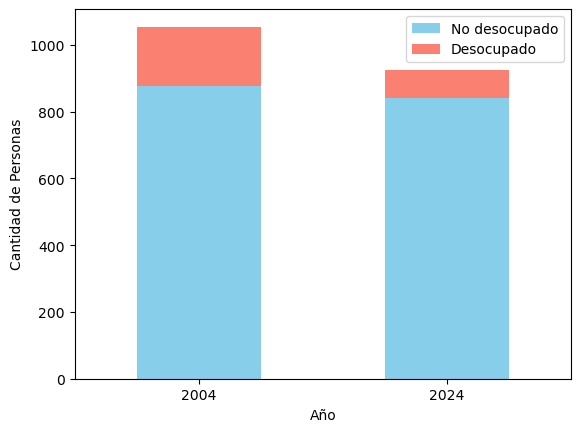

In [759]:
# Crear la columna PEA donde toma 1 si están ocupados (1) o desocupados (2) en ESTADO
# respondieron['PEA'] = respondieron['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)

respondieron.loc[:, 'PEA'] = respondieron['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)

# Contar la cantidad de personas en la PEA por año y estado de ocupación
conteo_pea = respondieron[respondieron['PEA'] == 1].groupby(['ANO4', 'ESTADO']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas para mostrar la composición de la PEA en 2004 y 2024
conteo_pea.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
#plt.title("Composición de la PEA en 2004 y 2024") # le ponemos el titulo en el overleaf
plt.xlabel("Año")
plt.ylabel("Cantidad de Personas")
plt.legend(["No desocupado", "Desocupado"], title="")
plt.xticks([0, 1], ["2004", "2024"], rotation=0)
plt.savefig("graf_ej4.png", format="png", dpi=300)
plt.show() 

### Ejercicio 5

Agreguen a la base respondieron una columna llamada PET (Población en Edad
para Trabajar) que tome 1 si están la persona tiene entre 15 y 65 años cumplidos.Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024.
Comenten los resultados y compare PET con PEA.

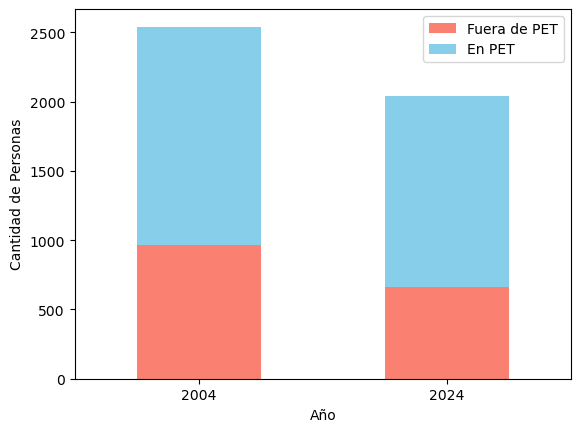

In [757]:
# Crear la columna PET donde toma 1 si la edad de la persona está entre 15 y 65 años
respondieron.loc[:, 'PET'] = respondieron['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Contar la cantidad de personas en la PET y fuera de ella por año
conteo_pet = respondieron.groupby(['ANO4', 'PET']).size().unstack(fill_value=0)

# Grafico
conteo_pet.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'])
plt.xlabel("Año")
plt.ylabel("Cantidad de Personas")
#plt.title("Composición de la Población en Edad para Trabajar (PET) por Año") # le ponemos el titulo en el overleaf
plt.legend(["Fuera de PET", "En PET"], title="")
plt.xticks([0, 1], ["2004", "2024"], rotation=0)
plt.savefig("graf_ej5.png", format="png", dpi=300)
plt.show()

### Ejercicio 6

Por último, agreguen la base respondieron una columna llamada desocupado que
tome 1 si esta desocupada. ¿Cuántas personas están desocupadas en 2004 vs 2024?

In [641]:
# Crear la columna DESOCUPADO donde toma 1 si la persona está desocupada (ESTADO == 2)
# respondieron['DESOCUPADO'] = respondieron['ESTADO'].apply(lambda x: 1 if x == 2 else 0)
respondieron.loc[:, 'DESOCUPADO'] = respondieron['ESTADO'].apply(lambda x: 1 if x == 2 else 0)

# Contar la cantidad de personas desocupadas por año
conteo_desocupados = respondieron[respondieron['DESOCUPADO'] == 1].groupby('ANO4').size()

# Mostrar el conteo de desocupados por año
print("Cantidad de personas desocupadas en 2004 vs 2024:\n", conteo_desocupados)

Cantidad de personas desocupadas en 2004 vs 2024:
 ANO4
2004    178
2024     81
dtype: int64


a- Muestre la proporción de desocupados por nivel educativo comparando 2004
vs 2024. ¿Hubo cambios de desocupados por nivel educativo?

In [655]:
proporcion_desocupados = (desocupados_por_nivel / total_por_nivel * 100).unstack().round(2)

# Pasamos a % 
proporcion_desocupados = proporcion_desocupados.applymap(lambda x: f"{x:.2f}%" if pd.notnull(x) else "N/A")

# Exporto la tabla a formato LaTeX con el símbolo de porcentaje
tabla_latex_desocup_nivel = proporcion_desocupados.to_latex(index=True, escape=False)
print("Tabla en formato LaTeX:")
print(tabla_latex_desocup_nivel)

# Muestro los resultados con el símbolo de porcentaje en pantalla
print("Proporción de desocupados por nivel educativo en 2004 vs 2024:\n", proporcion_desocupados)

Tabla en formato LaTeX:
\begin{tabular}{llllllll}
\toprule
NIVEL_ED_original & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
ANO4 &  &  &  &  &  &  &  \\
\midrule
2004 & 2.10% & 7.62% & 6.72% & 14.23% & 17.23% & 5.37% & 0.32% \\
2024 & 0.70% & 3.57% & 4.05% & 6.72% & 5.12% & 4.32% & N/A \\
\bottomrule
\end{tabular}

Proporción de desocupados por nivel educativo en 2004 vs 2024:
 NIVEL_ED_original      1      2      3       4       5      6      7
ANO4                                                                
2004               2.10%  7.62%  6.72%  14.23%  17.23%  5.37%  0.32%
2024               0.70%  3.57%  4.05%   6.72%   5.12%  4.32%    N/A


/var/folders/74/w7sgy8hs6c50_02v8h79362m0000gn/T/ipykernel_17377/2673922299.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  proporcion_desocupados = proporcion_desocupados.applymap(lambda x: f"{x:.2f}%" if pd.notnull(x) else "N/A")


b - Cree una variable categórica de años cumplidos (CH06) agrupada de a 10 años.
Muestre proporción de desocupados por edad agrupada comparando 2004 vs
2024. ¿Hubo cambios de desocupados por edad?


In [659]:

# Crear la variable categórica de grupos de edad (en intervalos de 10 años)
# respondieron['GRUPO_EDAD'] = pd.cut(respondieron['CH06'], bins=range(0, 101, 10), right=False)

respondieron.loc[:, 'GRUPO_EDAD'] = pd.cut(respondieron['CH06'], bins=range(0, 101, 10), right=False)

# Calcular el total de personas y desocupados por grupo de edad y año
total_por_edad = respondieron.groupby(['ANO4', 'GRUPO_EDAD'], observed=True).size()
desocupados_por_edad = respondieron[respondieron['DESOCUPADO'] == 1].groupby(['ANO4', 'GRUPO_EDAD'], observed=True).size()

# Calcular la proporción de desocupados por grupo de edad
proporcion_desocupados_edad = (desocupados_por_edad / total_por_edad * 100).unstack()

# Mostrar los resultados
print("Proporción de desocupados por grupo de edad en 2004 vs 2024:\n", proporcion_desocupados_edad)


Proporción de desocupados por grupo de edad en 2004 vs 2024:
 GRUPO_EDAD  [0, 10)  [10, 20)   [20, 30)   [30, 40)  [40, 50)  [50, 60)  \
ANO4                                                                      
2004            NaN  5.672269  18.543046  10.000000  7.539683  4.545455   
2024            NaN  2.445652  10.000000   5.747126  4.225352  2.898551   

GRUPO_EDAD  [60, 70)  [70, 80)  [80, 90)  [90, 100)  
ANO4                                                 
2004        2.739726  0.943396       NaN        NaN  
2024        2.272727       NaN       NaN        NaN  


In [663]:
respondieron.loc[:, 'GRUPO_EDAD'] = pd.cut(respondieron['CH06'], bins=range(0, 101, 10), right=False)

# Calcular el total de personas y desocupados por grupo de edad y año
total_por_edad = respondieron.groupby(['ANO4', 'GRUPO_EDAD'], observed=True).size()
desocupados_por_edad = respondieron[respondieron['DESOCUPADO'] == 1].groupby(['ANO4', 'GRUPO_EDAD'], observed=True).size()

# Calcular la proporción de desocupados por grupo de edad
proporcion_desocupados_edad = (desocupados_por_edad / total_por_edad * 100).unstack().round(2)

# Convertir los valores a cadenas con el símbolo de porcentaje
proporcion_desocupados_edad = proporcion_desocupados_edad.applymap(lambda x: f"{x:.2f} \\%" if pd.notnull(x) else 0)

# Exportar a LaTeX con el símbolo de porcentaje
tabla_latex_desocup_edad = proporcion_desocupados_edad.to_latex(index=True, escape=False)
print(tabla_latex_desocup_edad)

\begin{tabular}{lrlllllllrr}
\toprule
GRUPO_EDAD & [0, 10) & [10, 20) & [20, 30) & [30, 40) & [40, 50) & [50, 60) & [60, 70) & [70, 80) & [80, 90) & [90, 100) \\
ANO4 &  &  &  &  &  &  &  &  &  &  \\
\midrule
2004 & 0 & 5.67 \% & 18.54 \% & 10.00 \% & 7.54 \% & 4.55 \% & 2.74 \% & 0.94 \% & 0 & 0 \\
2024 & 0 & 2.45 \% & 10.00 \% & 5.75 \% & 4.23 \% & 2.90 \% & 2.27 \% & 0 & 0 & 0 \\
\bottomrule
\end{tabular}



/var/folders/74/w7sgy8hs6c50_02v8h79362m0000gn/T/ipykernel_17377/1561292191.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  proporcion_desocupados_edad = proporcion_desocupados_edad.applymap(lambda x: f"{x:.2f} \\%" if pd.notnull(x) else 0)


## PARTE II: Clasificación 
El objetivo de esta parte del trabajo es intentar predecir si una persona está desocupada o no utilizando distintas variables de características individuales.

# Ejercicio 1:
Para cada año, partan la base respondieron en una base de prueba (test) y una de entrenamiento (train) utilizando el comando train_test_split. La base de entrenamiento debe comprender el 70 % de los datos, y la semilla a utilizar (random state instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [726]:
# Importo librerias:
import numpy as np   
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


# ---- Generamos una base para 2004 y otra para 2024:
df_2004 = respondieron[respondieron['ANO4'] == 2004] 
df_2024 = respondieron[respondieron['ANO4'] == 2024]

#-- Dropeo año, ESTADO, PEA, PET, Nivel_ED_original y Grupo_edad:
df_2004 = df_2004.drop(['ANO4', 'ESTADO', 'PEA', 'PET', 'NIVEL_ED_original', 'GRUPO_EDAD'], axis=1).copy()
df_2024 = df_2024.drop(['ANO4', 'ESTADO', 'PEA', 'PET', 'NIVEL_ED_original', 'GRUPO_EDAD'], axis=1).copy()

#-- Divido en train y test:
# Para 2004
X_train_04, X_test_04, y_train_04, y_test_04 = train_test_split(df_2004.loc[:, df_2004.columns!="DESOCUPADO" ], df_2004["DESOCUPADO"],test_size=0.3, random_state=101) 

# Para 2024
X_train_24, X_test_24, y_train_24, y_test_24 = train_test_split(df_2024.loc[:, df_2024.columns!="DESOCUPADO" ], df_2024["DESOCUPADO"],test_size=0.3, random_state=101) 


# Genero el Intercepto: 
X_train_04["intercepto"]=1
X_test_04["intercepto"]=1
X_train_24["intercepto"]=1
X_test_24["intercepto"]=1 



# Ejercicio 2: 
Implementen los siguientes métodos reportando luego la matriz de confusión, la curva ROC, los valores de AUC y de Accuracy de cada uno: Regresión Logística, Análisis discriminante lineal y KNN con  k=3


### Regresion Logistica para el 2004

#### Estimo

In [728]:
# Estimo:
# Ajustamos el clasificador con el metodo fit() 
log_reg_04 = LogisticRegression(penalty=None, max_iter=300).fit(X_train_04, y_train_04) # uso X_train e y_train para entrenar el modelo
y_test_pred_score_04 = log_reg_04.predict_proba(X_test_04)[:,1]
y_test_pred_04 = log_reg_04.predict(X_test_04) #hago las predicciones sobre X_test 


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### i) AUC y ROC

AUC: 0.8881


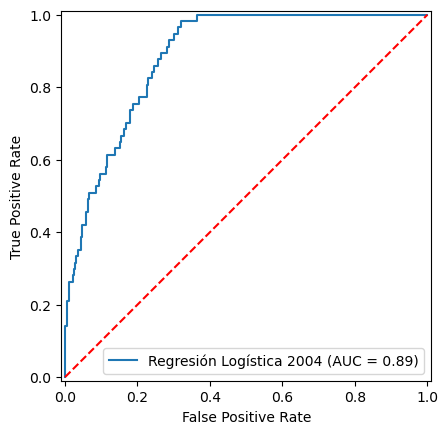

In [673]:
auc_04 = roc_auc_score(y_test_04, y_test_pred_score_04) #computo la curva ROC sobre el grupo de test y la prediccion sobre el grupo de test
print('AUC: %.4f' % auc_04)
fpr_04, tpr_04, thresholds_04 = roc_curve(y_test_04, y_test_pred_score_04)

display = RocCurveDisplay(fpr=fpr_04, tpr=tpr_04, roc_auc=auc_04, estimator_name='Regresión Logística 2004')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.savefig("curva_roc_log_2004.png", format="png", dpi=300)
plt.show() 

#### ii) Matriz de Confusión

Matriz de Confusion:
[[703   3]
 [ 49   8]]


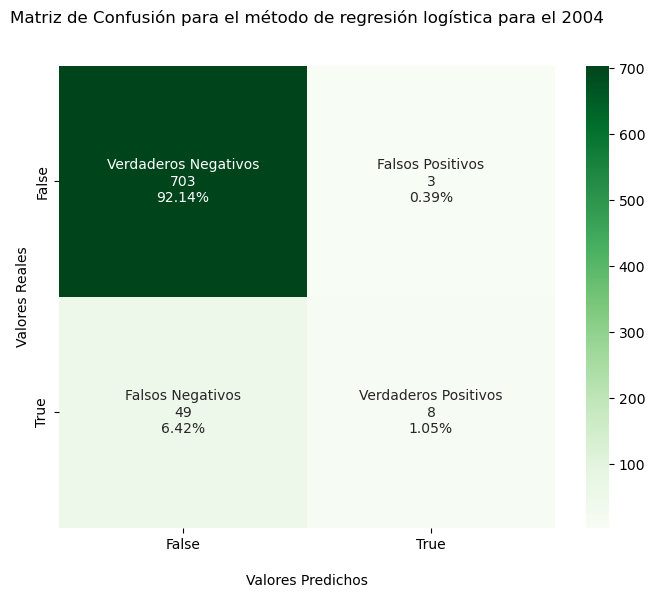

In [675]:
matriz_confusion_log_04 = confusion_matrix(y_test_04, y_test_pred_04)

print('Matriz de Confusion:')
print(matriz_confusion_log_04) 

# Ploteo la matriz de confusion:
group_names = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']

group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusion_log_04.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusion_log_04.flatten()/np.sum(matriz_confusion_log_04)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(matriz_confusion_log_04, annot=labels, fmt='', cmap='Greens')

ax.set_title('Matriz de Confusión para el método de regresión logística para el 2004\n\n');
ax.set_xlabel('\nValores Predichos')
ax.set_ylabel('Valores Reales');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
#La matriz de confusión tiene en las filas los valores ciertos y en las columnas los valores predichos
# plt.savefig("matriz_confusion_log_2004.png", format="png", dpi=300)  # Ajusta el nombre y formato según lo necesites

# Mostrar el gráfico
plt.show()

#### iii) Accuracy

In [677]:
ac_log_04= accuracy_score(y_test_04, y_test_pred_04)
print('Accuracy para el modelo logístico para el 2004 :','%.3f' % ac_log_04) 

Accuracy para el modelo logístico para el 2004 : 0.932


### Regresion Logistica para el 2024

#### Estimo 

In [679]:
# Estimo:
# Ajustamos el clasificador con el metodo fit() 
log_reg_24 = LogisticRegression(penalty=None, max_iter=300).fit(X_train_24, y_train_24) # uso X_train e y_train para entrenar el modelo
y_test_pred_score_24 = log_reg_24.predict_proba(X_test_24)[:,1]
y_test_pred_24 = log_reg_24.predict(X_test_24) #hago las predicciones sobre X_test 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### i) AUC y ROC

AUC: 0.9193


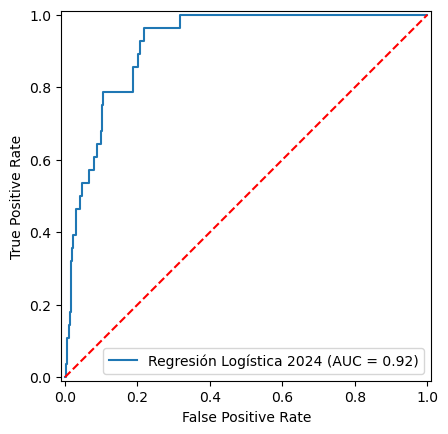

In [681]:
auc_24 = roc_auc_score(y_test_24, y_test_pred_score_24) #computo la curva ROC sobre el grupo de test y la prediccion sobre el grupo de test
print('AUC: %.4f' % auc_24)
fpr_24, tpr_24, thresholds_24 = roc_curve(y_test_24, y_test_pred_score_24)

display = RocCurveDisplay(fpr=fpr_24, tpr=tpr_24, roc_auc=auc_24, estimator_name='Regresión Logística 2024')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.savefig("curva_roc_log_2024.png", format="png", dpi=300)
plt.show() 

#### ii) Matriz de Confusion

Confusion Matrix :
[[584   0]
 [ 28   0]]


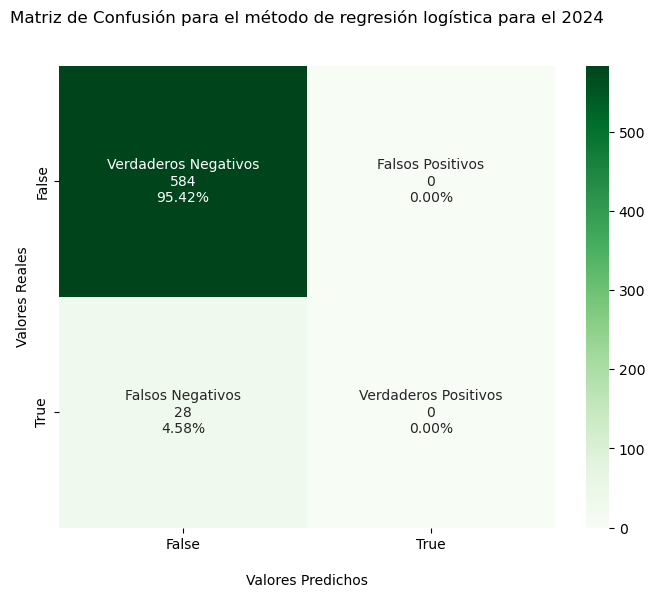

In [683]:
matriz_confusion_log_24 = confusion_matrix(y_test_24, y_test_pred_24)

print('Confusion Matrix :')
print(matriz_confusion_log_24) 

# Ploteo la matriz de confusion:
group_names = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']

group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusion_log_24.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusion_log_24.flatten()/np.sum(matriz_confusion_log_24)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
plt.figure(figsize=(8, 6))
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(matriz_confusion_log_24, annot=labels, fmt='', cmap='Greens')

ax.set_title('Matriz de Confusión para el método de regresión logística para el 2024\n\n');
ax.set_xlabel('\nValores Predichos')
ax.set_ylabel('Valores Reales');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
#La matriz de confusión tiene en las filas los valores ciertos y en las columnas los valores predichos
# plt.savefig("matriz_confusion_log_2024.png", format="png", dpi=300)  # Ajusta el nombre y formato según lo necesites

# Mostrar el gráfico
plt.show()

#### iii) Accuracy

In [685]:
ac_log_24= accuracy_score(y_test_24, y_test_pred_24)
print('Accuracy para el modelo logístico para el 2024 :','%.3f' % ac_log_24)

Accuracy para el modelo logístico para el 2024 : 0.954


### Análisis discriminante lineal para 2004

#### Estimo

In [687]:
lda = LinearDiscriminantAnalysis(n_components=1) # estimo el modelo 
lda_04 = lda.fit(X_train_04, y_train_04) 

# Predecimos con el modelo de Análisis discriminante lineal sobre las X test
y_test_pred_lda_04 = lda_04.predict(X_test_04)

#### i) AUC y ROC


 AUC para el modelo LDA para 2004: 0.622 



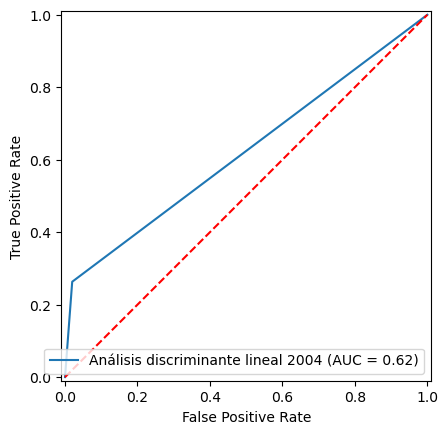

In [689]:
auc_lda_04 = roc_auc_score(y_test_04, y_test_pred_lda_04)
print('\n','AUC para el modelo LDA para 2004:', '%.3f' % auc_lda_04,'\n')

fpr_lda_04, tpr_lda_04, thresholds_lda_04 = roc_curve(y_test_04, y_test_pred_lda_04)

display = RocCurveDisplay(fpr=fpr_lda_04, tpr=tpr_lda_04, roc_auc=auc_lda_04, estimator_name='Análisis discriminante lineal 2004')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.savefig("curva_roc_lda_2004.png", format="png", dpi=300)
plt.show()


#### ii) Matriz de Confusión 

Matriz de Confusion :
[[692  14]
 [ 42  15]]


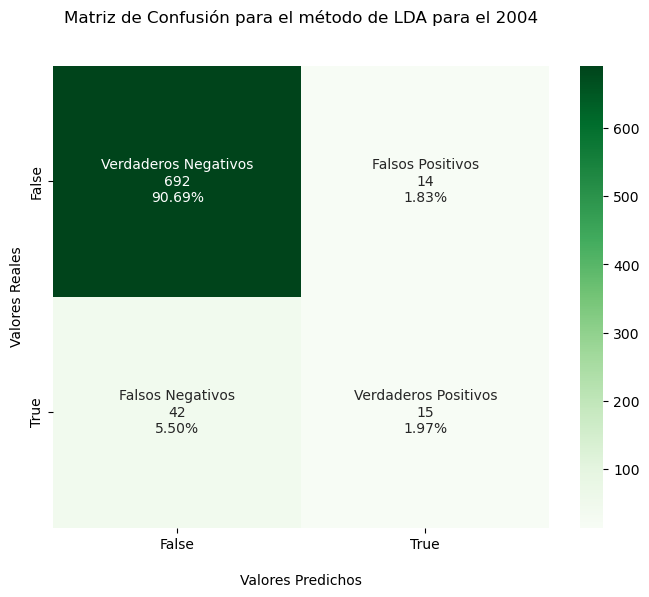

In [691]:
matriz_confusion_lda_04 = confusion_matrix(y_test_04, y_test_pred_lda_04)
print('Matriz de Confusion :')
print(matriz_confusion_lda_04) 

# Ploteo la matriz 
group_names = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']

group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusion_lda_04.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusion_lda_04.flatten()/np.sum(matriz_confusion_lda_04)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

plt.figure(figsize=(8, 6))
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(matriz_confusion_lda_04, annot=labels, fmt='', cmap='Greens')

ax.set_title('Matriz de Confusión para el método de LDA para el 2004\n\n');
ax.set_xlabel('\nValores Predichos')
ax.set_ylabel('Valores Reales');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
#La matriz de confusión tiene en las filas los valores ciertos y en las columnas los valores predichos
# plt.savefig("matriz_confusion_lda_2004.png", format="png", dpi=300)  # Ajusta el nombre y formato según lo necesites

# Mostrar el gráfico
plt.show()

#### iii) Accuracy

In [693]:
ac_lda_04= accuracy_score(y_test_04, y_test_pred_lda_04)
print('Accuracy para el modelo LDA para el 2004 :','%.3f' % ac_lda_04) 

Accuracy para el modelo LDA para el 2004 : 0.927


### Análisis discriminante lineal para 2024

#### Estimo 

In [695]:
lda = LinearDiscriminantAnalysis(n_components=1) # estimo el modelo 
lda_24 = lda.fit(X_train_24, y_train_24) 

# Predecimos con el modelo de Análisis discriminante lineal sobre las X test
y_test_pred_lda_24 = lda_24.predict(X_test_24) 

#### i) AUC y ROC


 AUC para el modelo LDA para 2024: 0.500 



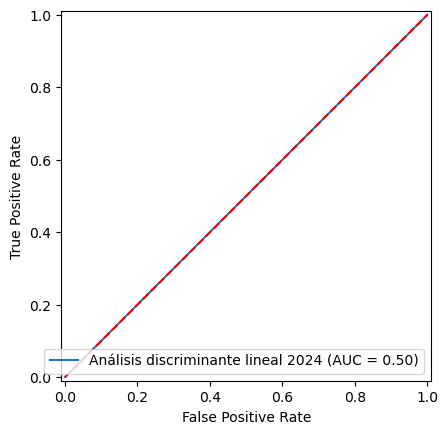

In [697]:
auc_lda_24 = roc_auc_score(y_test_24, y_test_pred_lda_24)
print('\n','AUC para el modelo LDA para 2024:', '%.3f' % auc_lda_24,'\n')

fpr_lda_24, tpr_lda_24, thresholds_lda_24 = roc_curve(y_test_24, y_test_pred_lda_24)

display = RocCurveDisplay(fpr=fpr_lda_24, tpr=tpr_lda_24, roc_auc=auc_lda_24, estimator_name='Análisis discriminante lineal 2024')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.savefig("curva_roc_lda_2024.png", format="png", dpi=300)
plt.show() 

#### ii) Matriz de Confusión

Confusion Matrix :
[[584   0]
 [ 28   0]]


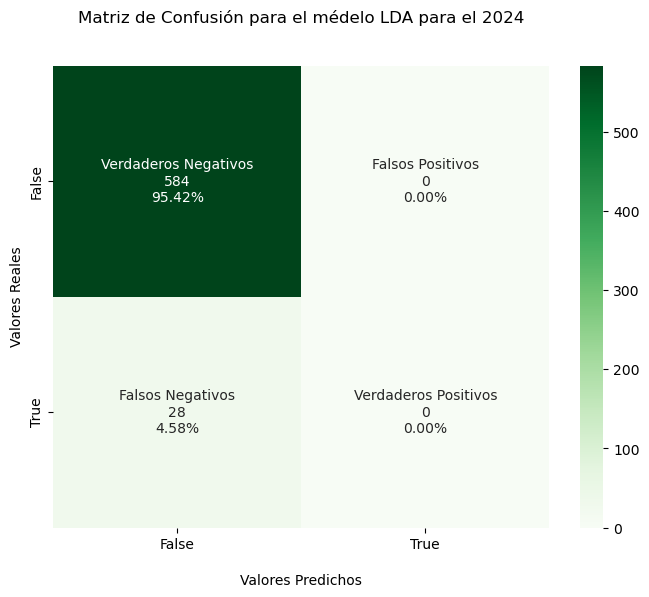

In [699]:
matriz_confusion_lda_24 = confusion_matrix(y_test_24, y_test_pred_lda_24)
print('Confusion Matrix :')
print(matriz_confusion_lda_24) 

# Ploteo la matriz 
group_names = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']

group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusion_lda_24.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusion_lda_24.flatten()/np.sum(matriz_confusion_lda_24)]

plt.figure(figsize=(8, 6))
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(matriz_confusion_lda_24, annot=labels, fmt='', cmap='Greens')

ax.set_title('Matriz de Confusión para el médelo LDA para el 2024\n\n');
ax.set_xlabel('\nValores Predichos')
ax.set_ylabel('Valores Reales');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
#La matriz de confusión tiene en las filas los valores ciertos y en las columnas los valores predichos
# plt.savefig("matriz_confusion_lda_2024.png", format="png", dpi=300)  # Ajusta el nombre y formato según lo necesites

# Mostrar el gráfico
plt.show()

#### iii) Accuracy

In [701]:
ac_lda_24= accuracy_score(y_test_24, y_test_pred_lda_24)
print('Accuracy para el modelo LDA para el 2024 :','%.3f' % ac_lda_24) 

Accuracy para el modelo LDA para el 2024 : 0.954


### KNN con k=3 para 2004

#### Estimo

In [703]:
knn_04 = KNeighborsClassifier(n_neighbors=3)
knn_04.fit(X_train_04, y_train_04)
# Predigo sobre el test:
y_pred_knn_04 = knn_04.predict(X_test_04)

#### i) AUC y ROC


 AUC para el modelo KNN para 2004: 0.535 



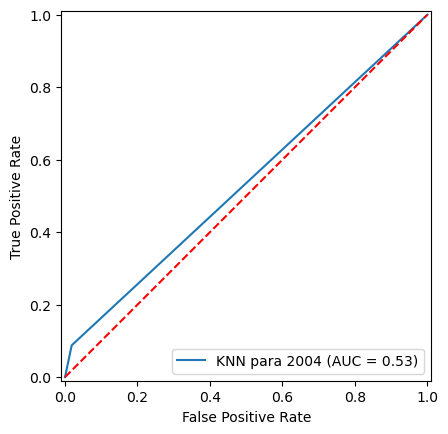

In [705]:
auc_knn_04 = roc_auc_score(y_test_04, y_pred_knn_04)
print('\n','AUC para el modelo KNN para 2004:', '%.3f' % auc_knn_04,'\n')

fpr_knn_04, tpr_knn_04, thresholds_knn_04 = roc_curve(y_test_04, y_pred_knn_04)

display = RocCurveDisplay(fpr=fpr_knn_04, tpr=tpr_knn_04, roc_auc=auc_knn_04, estimator_name='KNN para 2004')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.savefig("curva_roc_knn_2004.png", format="png", dpi=300)
plt.show() 


#### ii) Matriz de Confusión

Confusion Matrix :
[[693  13]
 [ 52   5]]


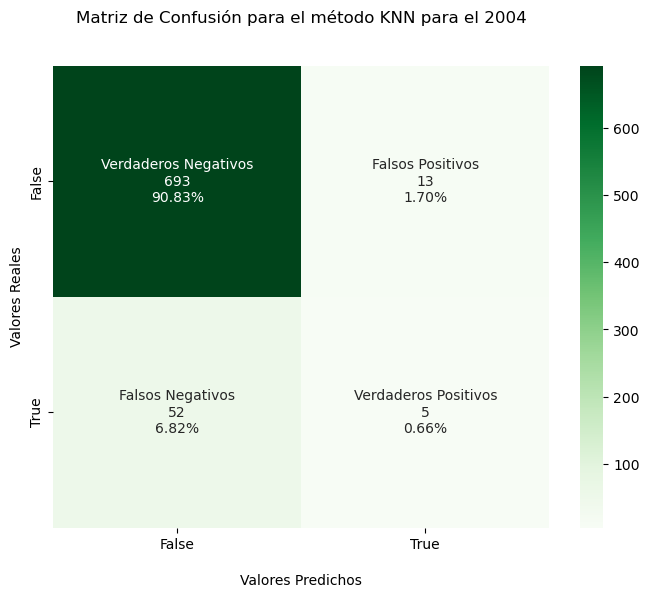

In [707]:
matriz_confusion_knn_04 = confusion_matrix(y_test_04, y_pred_knn_04)
print('Confusion Matrix :')
print(matriz_confusion_knn_04) 
# Ploteo la matriz 
group_names = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']

group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusion_knn_04.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusion_knn_04.flatten()/np.sum(matriz_confusion_knn_04)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

plt.figure(figsize=(8, 6))
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(matriz_confusion_knn_04, annot=labels, fmt='', cmap='Greens')

ax.set_title('Matriz de Confusión para el método KNN para el 2004\n\n');
ax.set_xlabel('\nValores Predichos')
ax.set_ylabel('Valores Reales');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
#La matriz de confusión tiene en las filas los valores ciertos y en las columnas los valores predichos 
# plt.savefig("matriz_confusion_knn_2004.png", format="png", dpi=300)  # Ajusta el nombre y formato según lo necesites

# Mostrar el gráfico
plt.show()

#### iii) Accuracy

In [709]:
ac_knn_04= accuracy_score(y_test_04, y_pred_knn_04)
print('Accuracy para el modelo KNN para el 2004 :','%.3f' % ac_knn_04)  

Accuracy para el modelo KNN para el 2004 : 0.915


### KNN con k=3 para 2024

#### Estimo

In [711]:
knn_24 = KNeighborsClassifier(n_neighbors=3)
knn_24.fit(X_train_24, y_train_24)
# Predigo sobre el test:
y_pred_knn_24 = knn_24.predict(X_test_24)

#### i) AUC y ROC 


 AUC para el modelo KNN para 2024: 0.490 



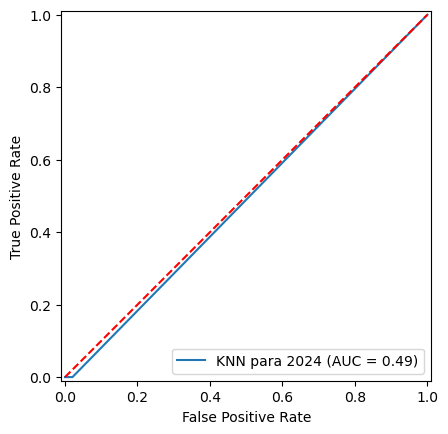

In [713]:
auc_knn_24 = roc_auc_score(y_test_24, y_pred_knn_24)
print('\n','AUC para el modelo KNN para 2024:', '%.3f' % auc_knn_24,'\n')

fpr_knn_24, tpr_knn_24, thresholds_knn_24 = roc_curve(y_test_24, y_pred_knn_24)

display = RocCurveDisplay(fpr=fpr_knn_24, tpr=tpr_knn_24, roc_auc=auc_knn_24, estimator_name='KNN para 2024')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.savefig("curva_roc_knn_2024.png", format="png", dpi=300)
plt.show() 

#### ii) Matriz de Confusión

Confusion Matrix :
[[572  12]
 [ 28   0]]


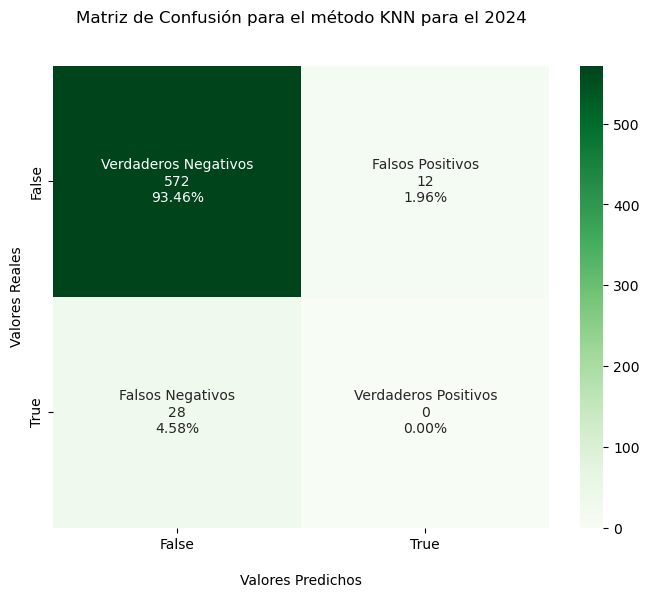

In [715]:
matriz_confusion_knn_24 = confusion_matrix(y_test_24, y_pred_knn_24)
print('Confusion Matrix :')
print(matriz_confusion_knn_24) 
# Ploteo la matriz 
group_names = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']

group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusion_knn_24.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusion_knn_24.flatten()/np.sum(matriz_confusion_knn_24)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

plt.figure(figsize=(8, 6))
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(matriz_confusion_knn_24, annot=labels, fmt='', cmap='Greens')

ax.set_title('Matriz de Confusión para el método KNN para el 2024\n\n');
ax.set_xlabel('\nValores Predichos')
ax.set_ylabel('Valores Reales');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
#La matriz de confusión tiene en las filas los valores ciertos y en las columnas los valores predichos
# plt.savefig("matriz_confusion_knn_2024.png", format="png", dpi=300)  # Ajusta el nombre y formato según lo necesites

# Mostrar el gráfico
plt.show()

#### iii) Accuracy 

In [717]:
ac_knn_24= accuracy_score(y_test_24, y_pred_knn_24)
print('Accuracy para el modelo KNN para el 2024 :','%.3f' % ac_knn_24)  

Accuracy para el modelo KNN para el 2024 : 0.935


# Ejercicio 3
En el informe

# Ejercicio 4
Con el método que seleccionaron, predigan qué personas son desocupadas dentro de la base norespondieron. ¿Qué proporción de las personas que no respondieron pudieron identificar como desocupadas?

In [723]:
#--- Genero una base para 2004 (a la cual le aplicaré la RL estimada para 2004) y otra para 2024 (a la cual le aplicaré la RL estimada para 2024)
noresp_04 = norespondieron[norespondieron['ANO4'] == 2004]
noresp_24 = norespondieron[norespondieron['ANO4'] == 2024]
# Recordemos que norespondieron todavia tiene ESTADO, NIVEL_ED_original y AÑO. Las dropeamos:
noresp_04 = noresp_04.drop(['ANO4', 'ESTADO', 'NIVEL_ED_original'], axis=1).copy()
noresp_24 = noresp_24.drop(['ANO4', 'ESTADO', 'NIVEL_ED_original'], axis=1).copy()

# Agregar la columna 'intercepto' utilizando `.loc`
noresp_04.loc[:, "intercepto"] = 1
noresp_24.loc[:, "intercepto"] = 1

# Genero una columna que me dice la prediccion sobre si es desempleado o no 
noresp_04.loc[:, 'Desempleado_Pred'] = log_reg_04.predict(noresp_04)
noresp_24.loc[:, 'Desempleado_Pred'] = log_reg_24.predict(noresp_24) 

# Muestro los resultados
print("Prediccion de estatus de desempleado sobre los que no respondieron en 2004:")
print(noresp_04['Desempleado_Pred'].head(6))
print("Prediccion de estatus de desempleado sobre los que no respondieron en 2024:")
print(noresp_24['Desempleado_Pred'].head()) 


Prediccion de estatus de desempleado sobre los que no respondieron en 2004:
14878    0
14906    0
15742    0
15974    0
16043    0
16855    0
Name: Desempleado_Pred, dtype: int64
Prediccion de estatus de desempleado sobre los que no respondieron en 2024:
4689     0
8955     0
12982    0
41691    0
Name: Desempleado_Pred, dtype: int64


No obtenemos desempleados para ninguno de los dos años. 